In [1]:
library("ggplot2")

## Zadanie 1

In [2]:
common = read.csv("data-common.csv", sep=";")
optimized = read.csv("data-optimized.csv", sep=";")

In [3]:
cc = aggregate(cbind(naive, better, gsl) ~ n, data = common, FUN = mean)
cc$naive_sd = aggregate(naive ~ n, data = common, FUN = sd)$naive
cc$better_sd = aggregate(better ~ n, data = common, FUN = sd)$better
cc$gsl_sd = aggregate(gsl ~ n, data = common, FUN = sd)$gsl
cc

n,naive,better,gsl,naive_sd,better_sd,gsl_sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,0.0025642,0.0032933,0.0005416,0.0001619957,0.0001646471,7.368582e-05
200,0.0218870,0.0248885,0.0040239,0.0005020197,0.0003618512,6.520813e-05
300,0.0789732,0.0842812,0.0135269,0.0009264514,0.0010488104,3.296582e-04
400,0.1992303,0.2008533,0.0322845,0.0146622394,0.0056747529,1.873250e-03
500,0.4004963,0.3896437,0.0612030,0.0288518662,0.0038445987,9.470056e-04
600,0.6852251,0.6769222,0.1055858,0.0067139570,0.0092150222,1.331708e-03
700,1.1184255,1.0992352,0.1765498,0.0412660232,0.0080151274,1.993075e-03
800,1.6846595,1.6162121,0.2683048,0.0118021013,0.0155000744,4.865894e-03
900,2.5591975,2.2894772,0.3812002,0.0247471519,0.0102734106,2.336574e-03


In [4]:
co = aggregate(cbind(naive, better, gsl) ~ n, data = optimized, FUN = mean)
co$naive_sd = aggregate(naive ~ n, data = optimized, FUN = sd)$naive
co$better_sd = aggregate(better ~ n, data = optimized, FUN = sd)$better
co$gsl_sd = aggregate(gsl ~ n, data = optimized, FUN = sd)$gsl
co

n,naive,better,gsl,naive_sd,better_sd,gsl_sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,0.0005828,0.0005377,0.0005627,6.292641e-05,6.414922e-05,6.237352e-05
200,0.0049234,0.0040627,0.0041506,2.130317e-04,1.402601e-04,7.546331e-05
300,0.0171396,0.0137437,0.0138102,4.651633e-04,5.451569e-04,4.388960e-04
400,0.0416638,0.0325072,0.0325344,8.499711e-04,8.774629e-04,5.934236e-04
500,0.0947948,0.0623565,0.0625537,1.936160e-03,1.021697e-03,7.018784e-04
600,0.1669466,0.1075990,0.1077370,2.908643e-03,7.524084e-04,8.015579e-04
700,0.2684609,0.1733927,0.1764729,5.220324e-03,3.535629e-03,2.965415e-03
800,0.4455674,0.2721719,0.2895714,5.071001e-02,2.050961e-02,2.603243e-02
900,0.7731368,0.4195847,0.4251365,1.294208e-01,2.787526e-02,3.300369e-02


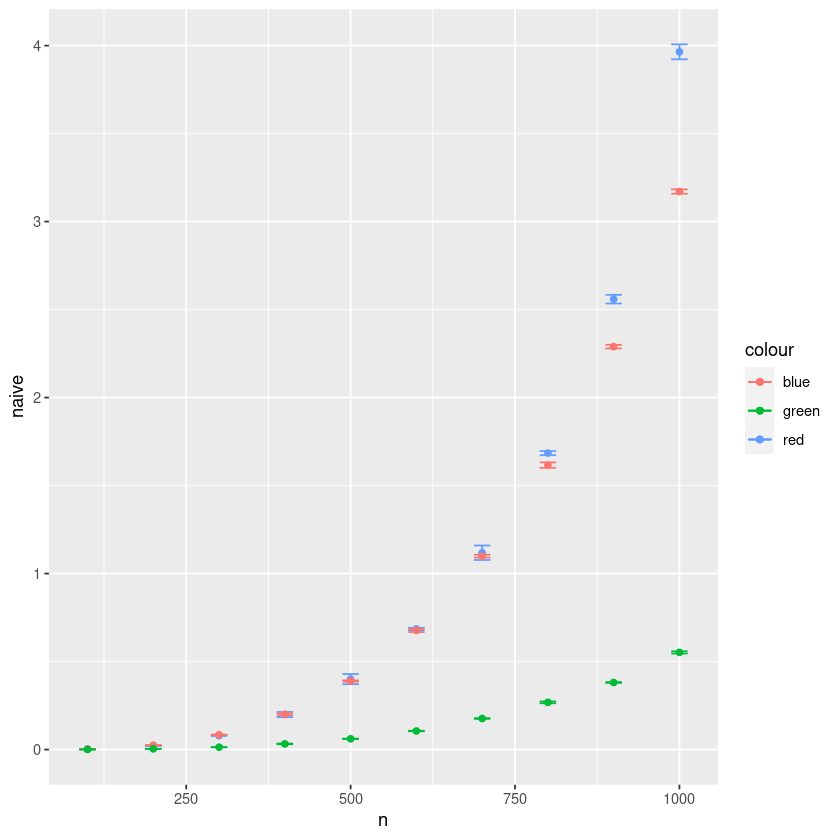

In [5]:
ggplot(data = cc) + 
    geom_point(aes(n, naive, colour = 'red')) + 
    geom_errorbar(aes(n, naive, ymin = naive - naive_sd, ymax = naive + naive_sd, colour = 'red'), width=25) +
    geom_point(aes(n, better, colour = 'blue')) +
    geom_errorbar(aes(n, better, ymin = better - better_sd, ymax = better + better_sd, colour = 'blue'), width=25) +
    geom_point(aes(n, gsl, colour = 'green')) +
    geom_errorbar(aes(n, gsl, ymin = gsl - gsl_sd, ymax = gsl + gsl_sd, colour = 'green'), width=25)

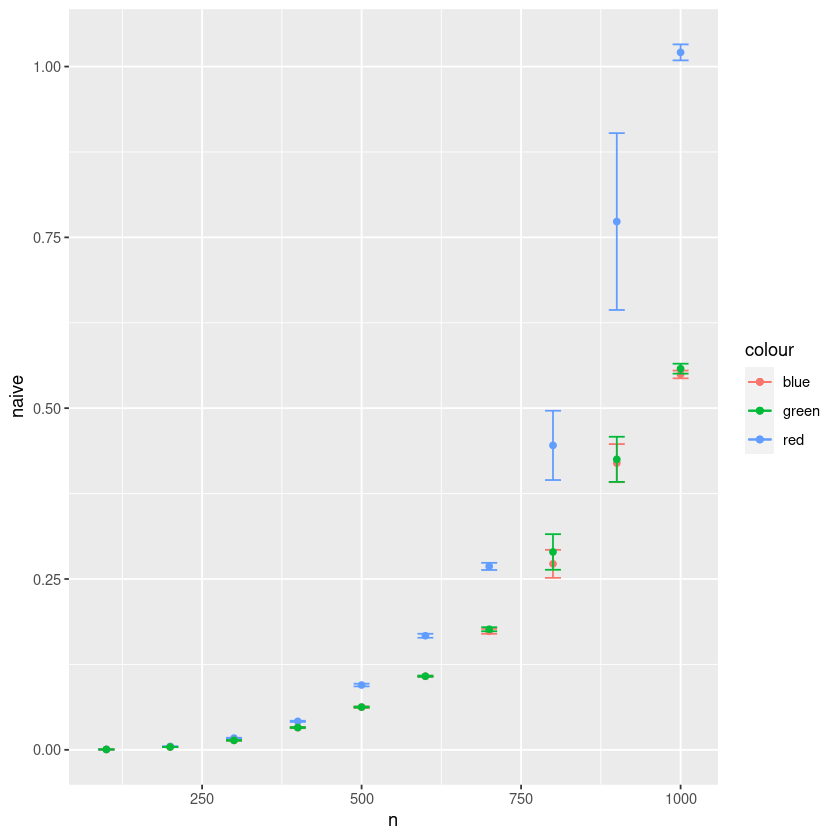

In [6]:
ggplot(data = co) + 
    geom_point(aes(n, naive, colour = 'red')) + 
    geom_errorbar(aes(n, naive, ymin = naive - naive_sd, ymax = naive + naive_sd, colour = 'red'), width=25) +
    geom_point(aes(n, better, colour = 'blue')) +
    geom_errorbar(aes(n, better, ymin = better - better_sd, ymax = better + better_sd, colour = 'blue'), width=25) +
    geom_point(aes(n, gsl, colour = 'green')) +
    geom_errorbar(aes(n, gsl, ymin = gsl - gsl_sd, ymax = gsl + gsl_sd, colour = 'green'), width=25)

In [7]:
fit_naive_common = lm(naive ~ poly(n, 3, raw=TRUE), data = cc)
fit_better_common = lm(better ~ poly(n, 3, raw=TRUE), data = cc)
fit_gsl_common = lm(gsl ~ poly(n, 3, raw=TRUE), data = cc)
fit_naive_optimized = lm(naive ~ poly(n, 3, raw=TRUE), data = co)
fit_better_optimized = lm(better ~ poly(n, 3, raw=TRUE), data = co)
fit_gsl_optimized = lm(gsl ~ poly(n, 3, raw=TRUE), data = co)

In [8]:
fits = data.frame(n = seq(100, 1000, length.out=1000))
fits$naive_common = predict(fit_naive_common, fits)
fits$better_common = predict(fit_better_common, fits)
fits$gsl_common = predict(fit_gsl_common, fits)
fits$naive_optimized = predict(fit_naive_optimized, fits)
fits$better_optimized = predict(fit_better_optimized, fits)
fits$gsl_optimized = predict(fit_gsl_optimized, fits)
fits

n,naive_common,better_common,gsl_common,naive_optimized,better_optimized,gsl_optimized
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100.0000,-0.037320543,0.002721011,-8.870011e-04,0.0007172084,0.001957652,0.003353686
100.9009,-0.036158531,0.002808732,-8.276314e-04,0.0008014818,0.001959565,0.003322588
101.8018,-0.035003065,0.002897970,-7.684018e-04,0.0008850712,0.001961662,0.003291874
102.7027,-0.033854108,0.002988738,-7.093090e-04,0.0009679844,0.001963944,0.003261547
103.6036,-0.032711624,0.003081052,-6.503496e-04,0.0010502291,0.001966416,0.003231609
104.5045,-0.031575575,0.003174924,-5.915202e-04,0.0011318134,0.001969080,0.003202062
105.4054,-0.030445926,0.003270369,-5.328175e-04,0.0012127449,0.001971938,0.003172908
106.3063,-0.029322640,0.003367400,-4.742381e-04,0.0012930316,0.001974993,0.003144151
107.2072,-0.028205681,0.003466032,-4.157786e-04,0.0013726812,0.001978249,0.003115792


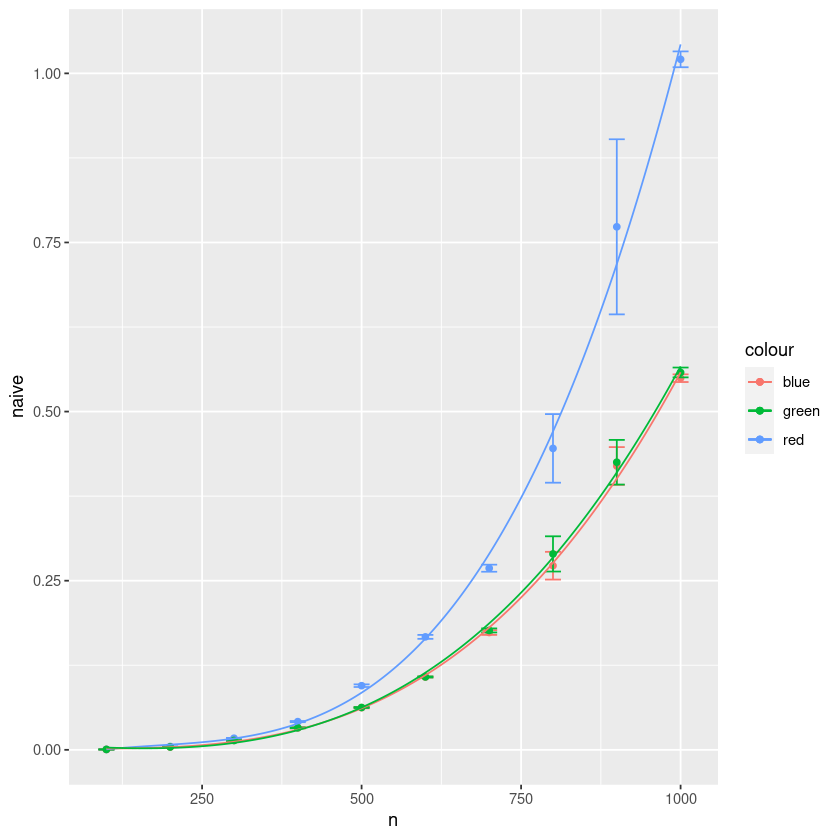

In [9]:
last_plot() + 
    geom_line(data = fits, aes(n, naive_optimized, colour = 'red')) +
    geom_line(data = fits, aes(n, better_optimized, colour = 'blue')) +
    geom_line(data = fits, aes(n, gsl_optimized, colour = 'green'))

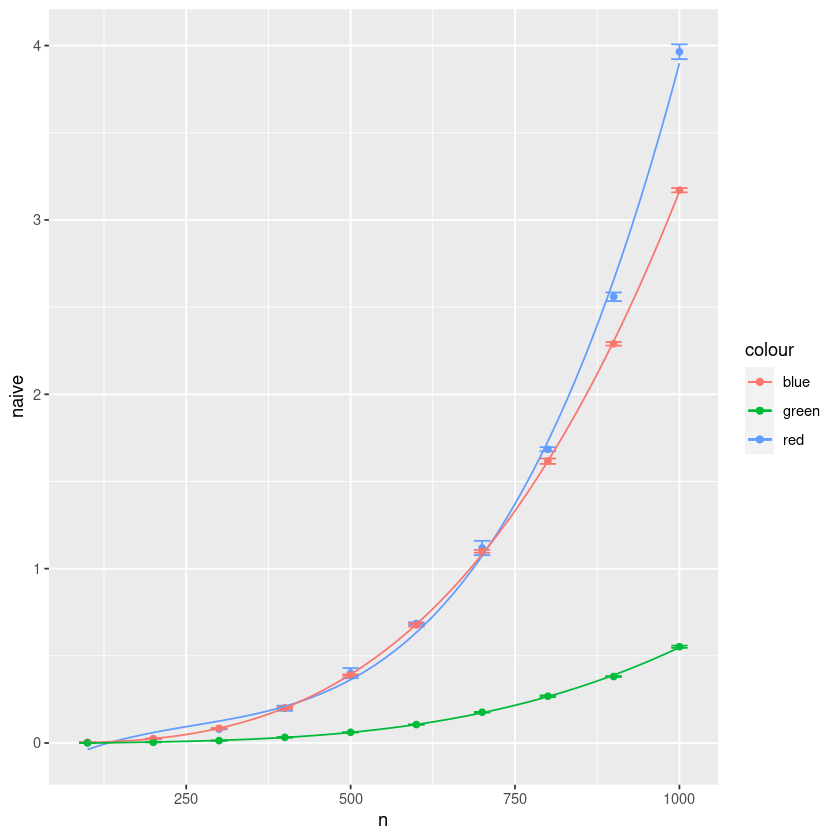

In [10]:
ggplot(data = cc) + 
    geom_point(aes(n, naive, colour = 'red')) + 
    geom_errorbar(aes(n, naive, ymin = naive - naive_sd, ymax = naive + naive_sd, colour = 'red'), width=25) +
    geom_point(aes(n, better, colour = 'blue')) +
    geom_errorbar(aes(n, better, ymin = better - better_sd, ymax = better + better_sd, colour = 'blue'), width=25) +
    geom_point(aes(n, gsl, colour = 'green')) +
    geom_errorbar(aes(n, gsl, ymin = gsl - gsl_sd, ymax = gsl + gsl_sd, colour = 'green'), width=25) +
    geom_line(data = fits, aes(n, naive_common, colour = 'red')) +
    geom_line(data = fits, aes(n, better_common, colour = 'blue')) +
    geom_line(data = fits, aes(n, gsl_common, colour = 'green'))